# Tutorial for *sigmaRel_Computer*

This tutorial demonstrates applications of sigmaRel_computer for analysing supernova siblings (SNe that exploded in the same host galaxy). 

With individual distance estimates to SN siblings, the relative intrinsic scatter, $\sigma_{\rm{Rel}}$, can be constrained without assuming any cosmology. This is the residual scatter of siblings distance estimates relative to one another within a galaxy; it quantifies the contribution towards the total intrinsic scatter, $\sigma_0$, that originates from within-galaxy variations about the siblings' common properties in each galaxy. The contrast of $\sigma_{\rm{Rel}}$ with $\sigma_0$ indicates whether it is within-galaxy variations, or the population variation of the siblings' common properties, that contributes most towards the total intrinsic scatter in the Hubble diagram.

We will:

1) Simulate individual siblings distances to siblings in multiple galaxies
2) Perform a single-galaxy analysis
3) Perform a multi-galaxy analysis

# 1) Simulate fake siblings distance estimates

In [1]:
#Firstly, set up the path files, and append model_files to the path
import sys
rootpath = './'
sys.path.append(rootpath+'model_files/')

#Load in simulate_distances class
from simulate_distances import *

### Let's simulate 100 galaxies, each with 3 siblings. 

Define $(\sigma_0, \sigma_{\rm{Rel}},\sigma_{\rm{pec}}) = (0.1\,\rm{mag},0.05\,\rm{mag},250\,\rm{km}\,\rm{s}^{-1})$. 

Further, simulate cosmology distances using the fiducial cosmology: ($H_0=73.24\,\rm{km}\,\rm{s}^{-1}\,\rm{Mpc}^{-1}, \Omega_{m,0}=0.28$)

Use default values for remaining simulation hyperparameters, e.g. $\hat{\sigma}_{z_{\rm{CMB}}}=1e-6$, and $\hat{\sigma}_{\rm{fit},s}=0.05\,$mag

The data are simulated and stored as a `pandas.DataFrame` called `dfmus` 

In [2]:
simulator = SiblingsDistanceSimulator(Ng=100,Sg=3,sigma0=0.1,sigmaRel=0.05,sigmapec=250,external_distances=True)
dfmus     = simulator.dfmus
dfmus.head()

,Galaxy,SN,mus,mu_errs,muext_zcmb_hats,zcmb_hats,zcmb_errs
0,G1,S1_G1,35.013272,0.05,35.027113,0.024275,0.000001
1,G1,S2_G1,35.055355,0.05,35.027113,0.024275,0.000001
2,G1,S3_G1,35.096812,0.05,35.027113,0.024275,0.000001
3,G2,S1_G2,34.580618,0.05,34.736455,0.021283,0.000001
4,G2,S2_G2,34.902662,0.05,34.736455,0.021283,0.000001


# 2) Single-galaxy siblings analysis

Take the first galaxy, G1, and do a simple analysis via the `single_galaxy` class.

Use a fiducial value of $\sigma^*_0=0.1\,$mag by default.

Use bools to `show` plots, but not `save` them. 

In [3]:
from sigmaRel import *

#Take first galaxy
dfgal  = dfmus[dfmus['Galaxy']=='G1']
#Instantiate siblings_galaxy class for a single-galaxy analysis
sibgal = siblings_galaxy(mus     = dfgal['mus'].values,
                         errors  = dfgal['mu_errs'].values,
                         names   = dfgal['SN'].values,
                         galname = 'G1',
                         sigma0  = 0.1, show=True, save=False)

### Plot the individual distance estimates

The bold lines are just the measurement errors, or 'fitting uncertainties'; the faint lines additionally include the assumed total intrinsic scatter, $\sigma_0$:

$$\hat{\sigma}_{\rm{tot},\,s} = \sqrt{\hat{\sigma}^2_0+\hat{\sigma}^2_{\rm{fit},\,s}}$$

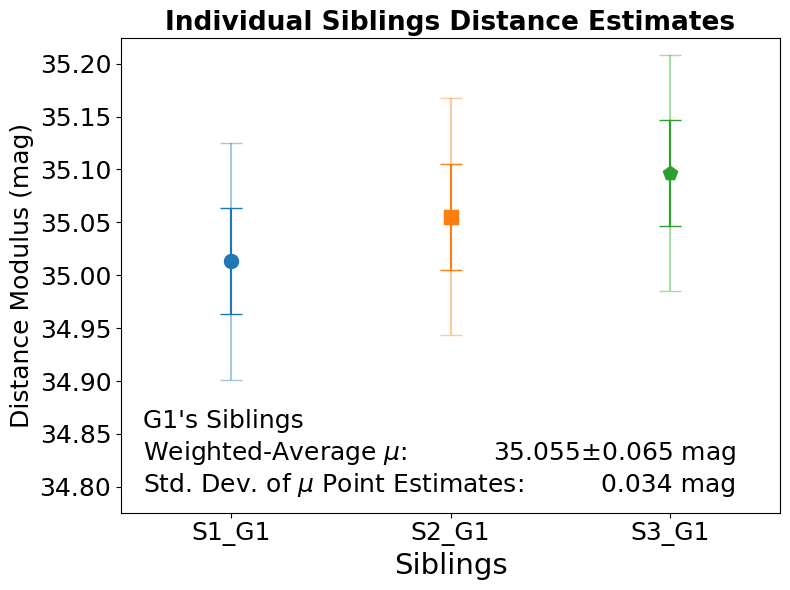

In [4]:
sibgal.plot_individual_distances()

### Compute analytic $\sigma_{\rm{Rel}}$ posteriors for different choices of $\sigma_0$ prior upper bound

Although the individual distance estimates are consistent with one another (small sample standard deviation of distance point estimates, and consistent within measurement errors, meaning the $\sigma_{\rm{Rel}}=0$ assumption is valid), the small sample size means larger values of $\sigma_{\rm{Rel}}$ are not ruled out. In particular, applying an uninformative prior yields a high $95\%$ upper bound, larger than typical values of $\sigma_0 \approx 0.1-0.2\,$mag.

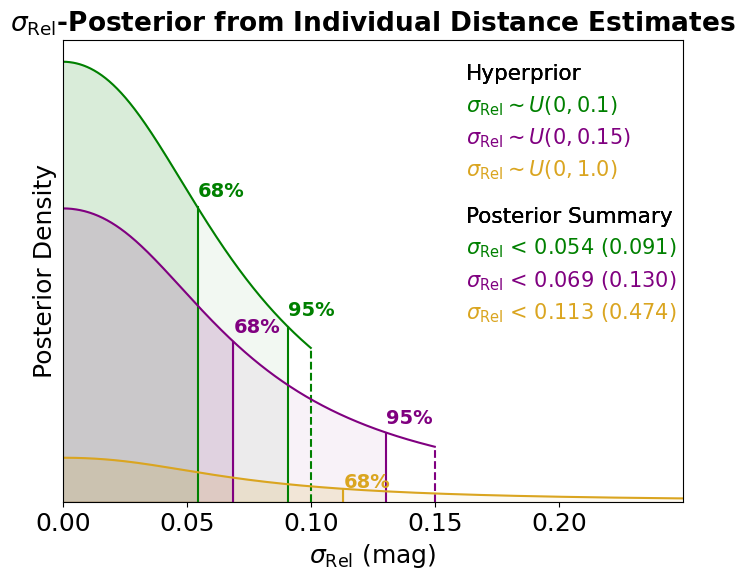

In [5]:
sibgal.plot_sigmaRel_posteriors()

### Now, compute posterior on the common distance for different intrinsic scatter modelling assumptions:

1) $\delta M$-Uncorrelated $\equiv \sigma_{\rm{Rel}}=\sigma_0$
2) $\delta M$-Common $\equiv \sigma_{\rm{Rel}}=0$
3) $\delta M$-Mixed $\equiv \rho\sim \textrm{Arcsine}(0,1)$

For the $\delta M$-Mixed assumption, we perform $\sigma_{\rm{Rel}}$-marginalisation using the Arcsine $\rho$-hyperprior, where $\rho=1-\sigma^2_{\rm{Rel}}/\sigma_0^2$ is the correlation. An alternative choice is a uniform hyperprior $\rho \sim U(0,1)$, but this assigns zero probability to $\sigma_{\rm{Rel}}=0$ (and also zero probability to $\sigma_{\rm{Common}}=0$ where $\sigma^2_0 = \sigma^2_{\rm{Rel}}+\sigma^2_{\rm{Common}}$).

In [6]:
sibgal.combine_individual_distances()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


##########################################################################################
Beginning Stan fit adopting the dM-Uncorrelated assumption


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


Fit Completed; Summary is:
mean            35.056
sd               0.065
hdi_3%          34.935
hdi_97%         35.180
mcse_mean        0.000
mcse_sd          0.000
ess_bulk     24191.000
ess_tail     38364.000
r_hat            1.000
Name: mu, dtype: float64
Estimates of distance
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dM-Uncorrelated Common-mu = 35.056+/-0.065
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##########################################################################################
Beginning Stan fit adopting the dM-Mixed assumption


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


Fit Completed; Summary is:
mean            35.056
sd               0.091
hdi_3%          34.882
hdi_97%         35.228
mcse_mean        0.000
mcse_sd          0.000
ess_bulk     47400.000
ess_tail     58950.000
r_hat            1.000
Name: mu, dtype: float64
Estimates of distance
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dM-Mixed Common-mu = 35.056+/-0.091
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##########################################################################################
Beginning Stan fit adopting the dM-Common assumption


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Fit Completed; Summary is:
mean            35.056
sd               0.103
hdi_3%          34.863
hdi_97%         35.250
mcse_mean        0.001
mcse_sd          0.001
ess_bulk     19599.000
ess_tail     20956.000
r_hat            1.000
Name: mu, dtype: float64
Estimates of distance
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dM-Common Common-mu = 35.056+/-0.103
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##########################################################################################
{'uncorrelated': {'median': 35.056, 'std': 0.065}, 'mixed': {'median': 35.056, 'std': 0.091}, 'common': {'median': 35.056, 'std': 0.103}}
uncorrelated {'median': 35.056, 'std': 0.065}
mixed {'median': 35.056, 'std': 0.091}
common {'median': 35.056, 'std': 0.103}


### Plot up the results

As the siblings are assumed to be more correlated, the uncertainty on the common distance hyperparameter gets larger.

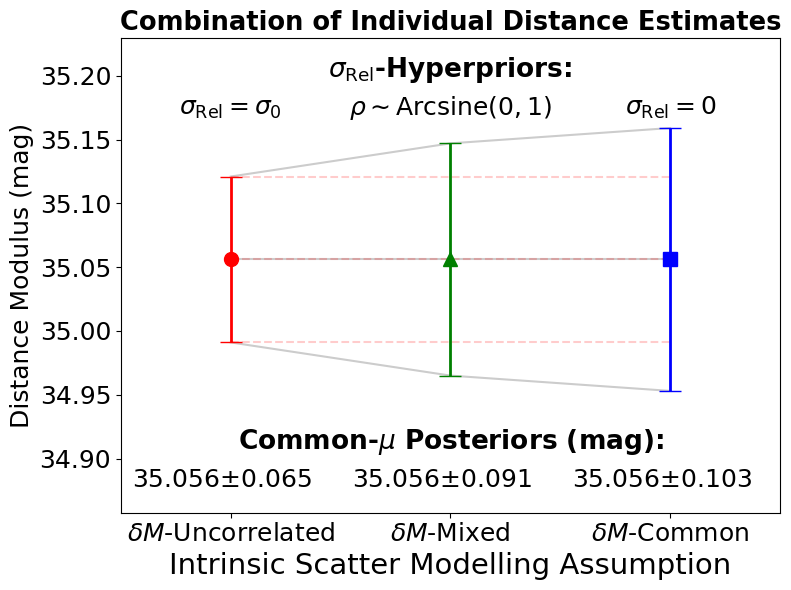

In [7]:
sibgal.plot_common_distances()

# 3) Multi-galaxy siblings analysis

Let's now instantiate the multi-galaxy siblings class.

The simplest analysis we can do is to compute analytic $\sigma_{\rm{Rel}}$ posteriors for different choices of prior, as we did above, but now using all the galaxies.

We see the posteriors are much more constraining, consistent with the true value $\sigma_{\rm{Rel}}=0.05\,$mag, and insensitive to the prior upper bound.

Need 'zhelio_hats' column to compute redshift-based cosmology distances
Using pre-supplied cosmology distances: muext_zcmb_hats
Cosmo. sub-samp cannot be created by applying limits: {'thetas': [-1.5, 2.0], 'AVs': [0.0, 1.0]} because ['thetas', 'AVs'] missing from input columns;
Instead set all SNe as belonging to 'cosmo_sample'
         SN Galaxy        mus  mu_errs  zcmb_hats  muext_zcmb_hats
0     S1_G1     G1  35.013272     0.05   0.024275        35.027113
1     S2_G1     G1  35.055355     0.05   0.024275        35.027113
2     S3_G1     G1  35.096812     0.05   0.024275        35.027113
27   S1_G10    G10  34.612645     0.05   0.020466        34.650078
28   S2_G10    G10  34.640811     0.05   0.020466        34.650078
..      ...    ...        ...      ...        ...              ...
292  S2_G98    G98  36.851187     0.05   0.053746        36.800818
293  S3_G98    G98  36.827954     0.05   0.053746        36.800818
294  S1_G99    G99  35.986652     0.05   0.037702        36.005110


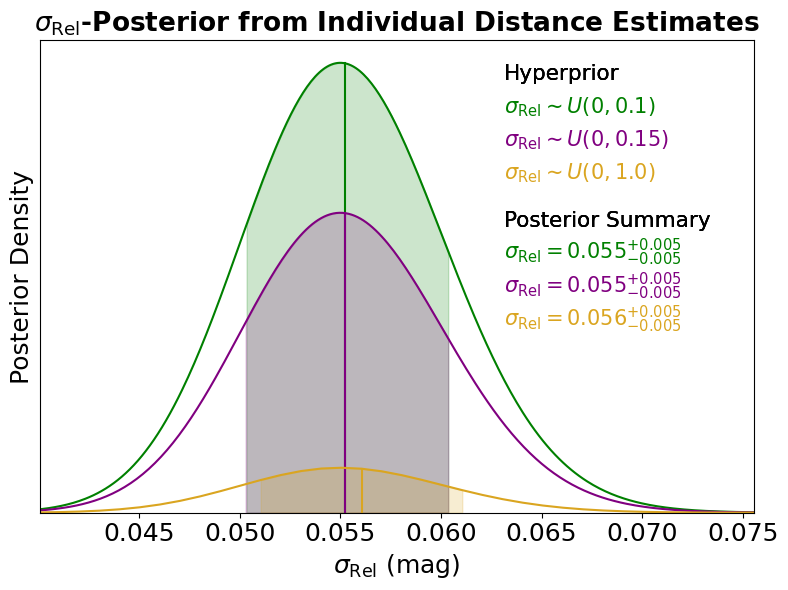

In [8]:
multigal = multi_galaxy_siblings(dfmus)

multigal.compute_analytic_multi_gal_sigmaRel_posterior(prior_upper_bounds=[0.1,0.15,1.0])

### Further, we can sample posteriors, and fit for e.g. $\sigma_0$ or $\sigma_{\rm{pec}}$, or both, using the external distances

Let's first choose to fix $\sigma_{\rm{pec}}=250\,$km$\,$s$^{-1}$, but free $\sigma_0$ (the default prior is $\sigma_0 \sim U(0,1)$).

When we build the model, a new .stan file is created to match the user specifications. 

In [9]:
#Can re-instantiate class and sample
#multigal = multi_galaxy_siblings(dfmus,sigma0='free',sigmapec=250,use_external_distances=True,zcosmo='zcmb')

#Or use same class and sample, with choices specified
multigal.sigmaRel_sampler(sigma0='free',sigmapec=250,use_external_distances=True,zcosmo='zcmb')

INFO:cmdstanpy:compiling stan file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model.stan to exe file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model


##############################
sigma0 is a free hyperparameter
sigmapec fixed at 250
Using external distances
sigmaRel is free hyperparameter
##############################
data {
    int<lower=0> Ng;
    array[Ng] int<lower=2> S_g;
    int <lower=Ng*2> Nsibs;

    vector[Nsibs] mu_sib_phots;
    vector[Nsibs] mu_sib_phot_errs;

    vector[Ng] mu_ext_gal;
    vector[Ng] zcosmos;
    vector[Ng] zcosmoerrs;

    //real<lower=0,upper=1> sigma0;    //Data
    real<lower=0,upper=1> pec_unity; //Data
}
transformed data{
  vector[Ng] mu_ext_gal_err_prefac;
  for (n in 1:Ng){
    mu_ext_gal_err_prefac[n] = 5/(log(10)*zcosmos[n]);
  }
}
parameters {
    vector[Ng] mu_true_gal;

    vector[Ng] eta_dM_common;
    vector[Nsibs] eta_dM_rel;

    real<lower=0,upper=1> rho;   //Model
    real<lower=0,upper=1> sigma0;//Model
    //real<lower=0,upper=1> pec_unity;  //Model
}

transformed parameters {
    vector[Ng] dM_common;
    vector[Nsibs] dM_rel;
    vector[Nsibs] dM_sibs;
    real sigmaRel;
    r

INFO:cmdstanpy:compiled model executable: /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Thinning samples down to 1000 per chain to save on space complexity


/Users/samward/opt/anaconda3/envs/sigmaRel/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/samward/opt/anaconda3/envs/sigmaRel/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/samward/opt/anaconda3/envs/sigmaRel/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


Fit Completed; Summary is:
##############################
rho, median, std, 16, 84 // 68%, 95%
0.651 0.073 0.571 0.715
0.683 0.755
Rhat: 1.0
##############################
sigma0, median, std, 16, 84 // 68%, 95%
0.094 0.008 0.087 0.101
0.097 0.107
Rhat: 1.0
##############################
sigmaRel, median, std, 16, 84 // 68%, 95%
0.055 0.005 0.051 0.06
0.058 0.064
Rhat: 1.0
##############################
sigmaCommon, median, std, 16, 84 // 68%, 95%
0.076 0.009 0.067 0.084
0.08 0.091
Rhat: 1.0


### Now plot the posterior

Rhats: {'rho': 1.0, 'sigma0': 1.0, 'sigmaRel': 1.0, 'sigmaCommon': 1.0}
###############
5%, 50%, 68%, 95% quantiles: 0.52, 0.65, 0.68,0.75
rho: 0.65 +/- 0.07; 16th and 84th intervals: -0.08+0.06
###############
p_sigma0_0.094: 51.625 %
5%, 50%, 68%, 95% quantiles: 0.08, 0.09, 0.1,0.11
sigma0: 0.09 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
5%, 50%, 68%, 95% quantiles: 0.05, 0.06, 0.06,0.06
sigmaRel: 0.06 +/- 0.01; 16th and 84th intervals: -0.0+0.01
###############
5%, 50%, 68%, 95% quantiles: 0.06, 0.08, 0.08,0.09
sigmaCommon: 0.08 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
Corner samples/contours plotted successfully


/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:319: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[d-1,col].set_xticklabels(new_xlabels)


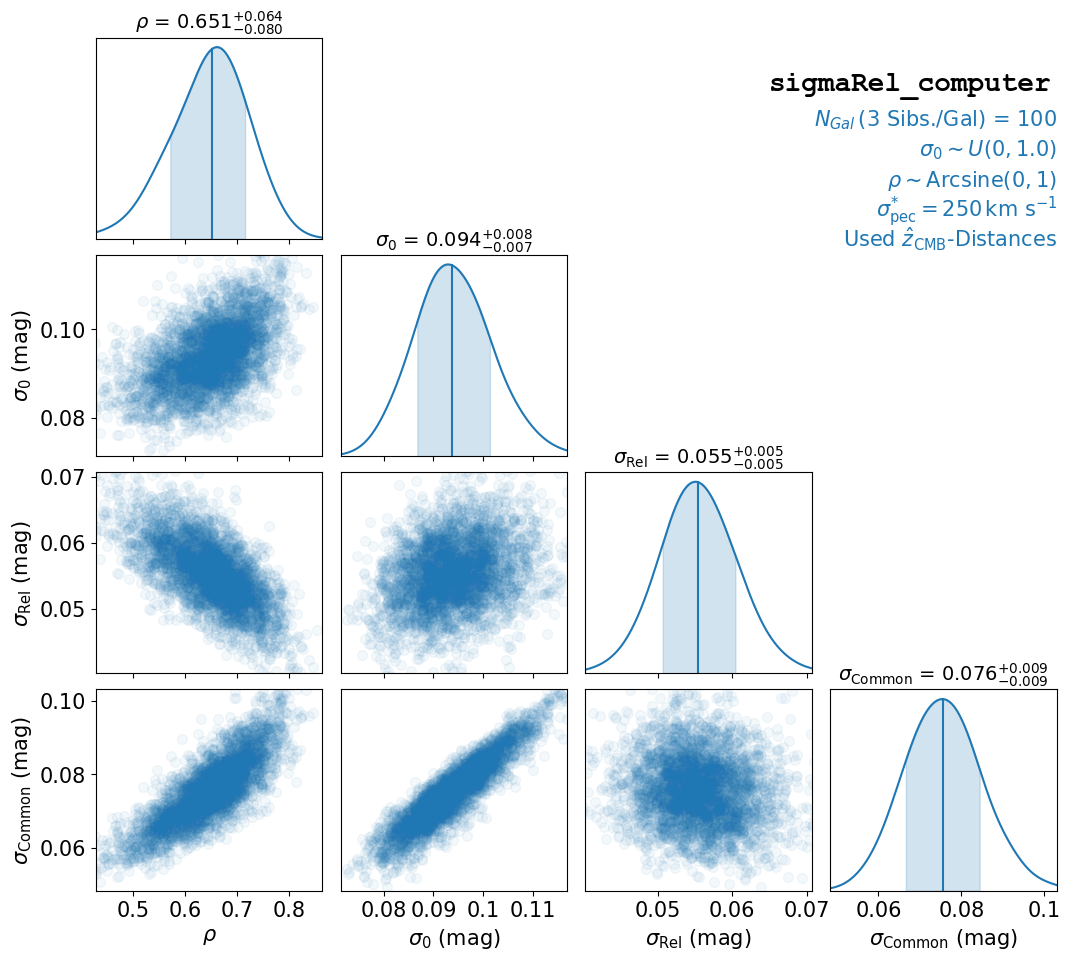

In [10]:
multigal.plot_posterior_samples(show=True,save=False)

### We can repeat this analysis, but this time freeing $\sigma_{\rm{pec}}$ as well

In [11]:
multigal.sigmaRel_sampler(sigmapec='free')

INFO:cmdstanpy:compiling stan file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model.stan to exe file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model


##############################
sigma0 is a free hyperparameter
sigmapec is a free hyperparameter
Using external distances
sigmaRel is free hyperparameter
##############################
data {
    int<lower=0> Ng;
    array[Ng] int<lower=2> S_g;
    int <lower=Ng*2> Nsibs;

    vector[Nsibs] mu_sib_phots;
    vector[Nsibs] mu_sib_phot_errs;

    vector[Ng] mu_ext_gal;
    vector[Ng] zcosmos;
    vector[Ng] zcosmoerrs;

    //real<lower=0,upper=1> sigma0;    //Data
    //real<lower=0,upper=1> pec_unity; //Data
}
transformed data{
  vector[Ng] mu_ext_gal_err_prefac;
  for (n in 1:Ng){
    mu_ext_gal_err_prefac[n] = 5/(log(10)*zcosmos[n]);
  }
}
parameters {
    vector[Ng] mu_true_gal;

    vector[Ng] eta_dM_common;
    vector[Nsibs] eta_dM_rel;

    real<lower=0,upper=1> rho;   //Model
    real<lower=0,upper=1> sigma0;//Model
    real<lower=0,upper=1> pec_unity;  //Model
}

transformed parameters {
    vector[Ng] dM_common;
    vector[Nsibs] dM_rel;
    vector[Nsibs] dM_sibs;
    real sig

INFO:cmdstanpy:compiled model executable: /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Thinning samples down to 1000 per chain to save on space complexity


/Users/samward/opt/anaconda3/envs/sigmaRel/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/samward/opt/anaconda3/envs/sigmaRel/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/samward/opt/anaconda3/envs/sigmaRel/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


Fit Completed; Summary is:
##############################
rho, median, std, 16, 84 // 68%, 95%
0.631 0.093 0.536 0.712
0.672 0.754
Rhat: 1.0
##############################
sigma0, median, std, 16, 84 // 68%, 95%
0.091 0.009 0.083 0.1
0.095 0.106
Rhat: 1.0
##############################
sigmaRel, median, std, 16, 84 // 68%, 95%
0.055 0.005 0.05 0.06
0.057 0.064
Rhat: 1.0
##############################
sigmaCommon, median, std, 16, 84 // 68%, 95%
0.072 0.011 0.061 0.083
0.077 0.09
Rhat: 1.0
##############################
sigmapec, median, std, 16, 84 // 68%, 95%
294.545 69.027 232.151 365.126
326.849 419.918
Rhat: 1.0


Rhats: {'rho': 1.0, 'sigma0': 1.0, 'sigmaRel': 1.0, 'sigmaCommon': 1.0, 'sigmapec': 1.0}
###############
5%, 50%, 68%, 95% quantiles: 0.46, 0.63, 0.67,0.75
rho: 0.63 +/- 0.09; 16th and 84th intervals: -0.1+0.08
###############
p_sigma0_0.094: 63.25 %
5%, 50%, 68%, 95% quantiles: 0.08, 0.09, 0.1,0.11
sigma0: 0.09 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
5%, 50%, 68%, 95% quantiles: 0.05, 0.06, 0.06,0.06
sigmaRel: 0.06 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
5%, 50%, 68%, 95% quantiles: 0.05, 0.07, 0.08,0.09
sigmaCommon: 0.07 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
5%, 50%, 68%, 95% quantiles: 194.02, 294.54, 326.85,419.92
sigmapec: 294.54 +/- 69.02; 16th and 84th intervals: -62.39+70.58
###############
Corner samples/contours plotted successfully


/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:319: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[d-1,col].set_xticklabels(new_xlabels)


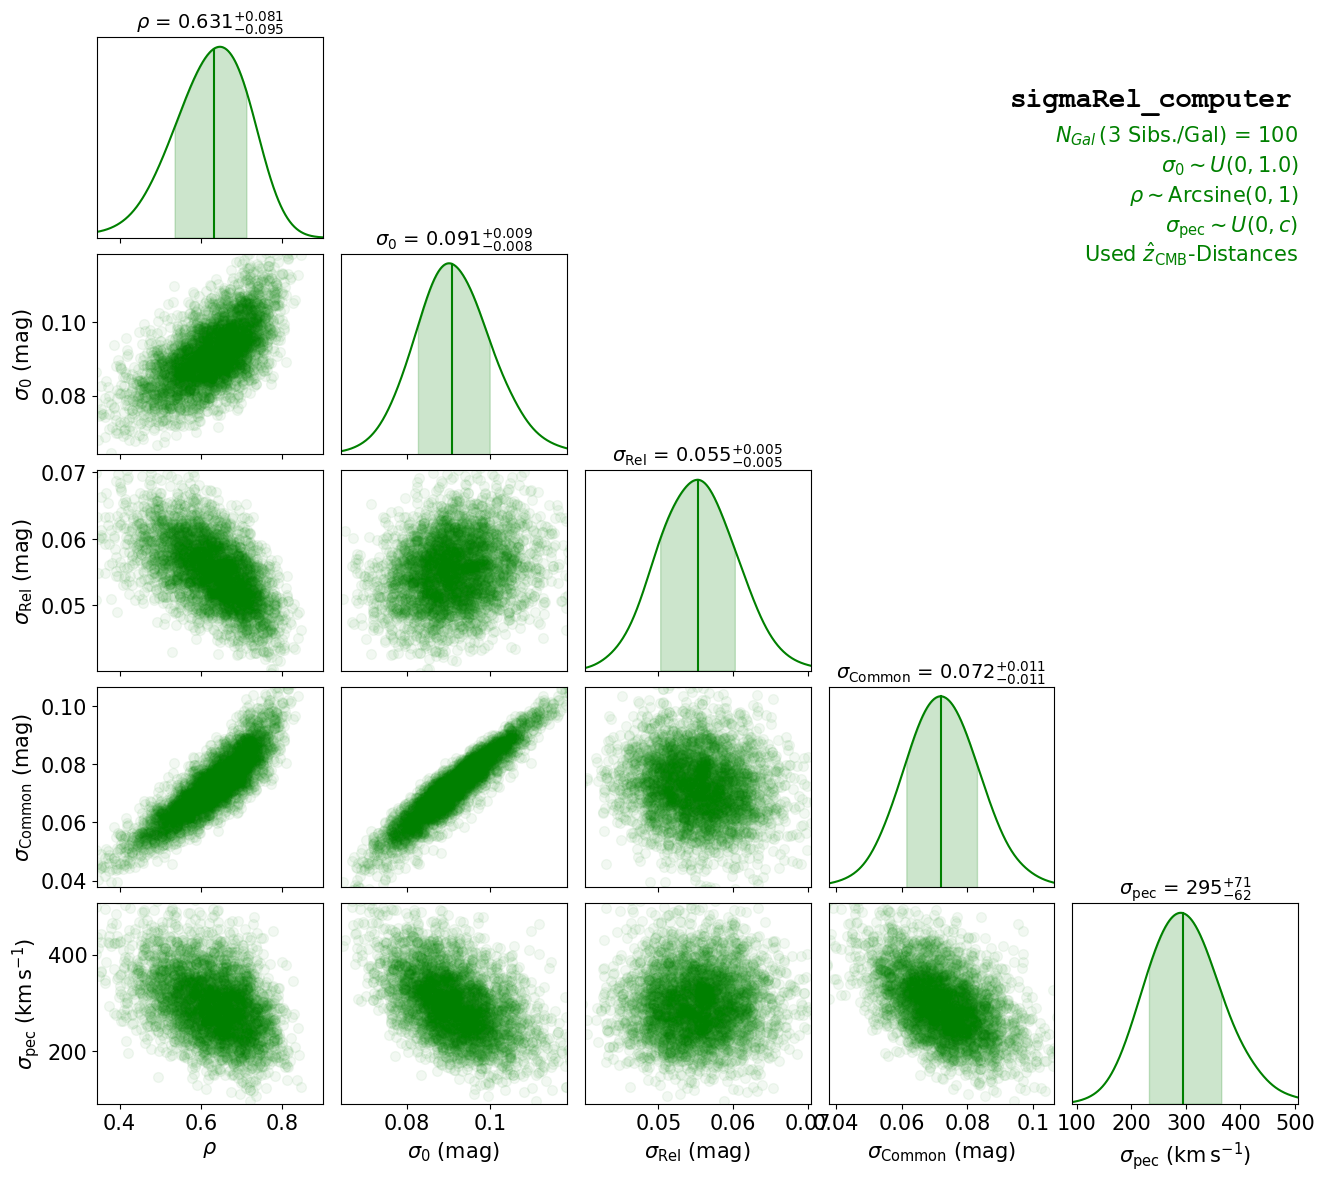

In [12]:
multigal.plot_posterior_samples(show=True,save=False,colour='green')

### Let's repeat again, this time with a uniform $\rho$-hyperprior (instead of the default Arcsine hyperprior)

In [13]:
multigal.sigmaRel_sampler(alt_prior='uniform',sigmapec=250)

INFO:cmdstanpy:compiling stan file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model.stan to exe file /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model


##############################
sigma0 is a free hyperparameter
sigmapec fixed at 250
Using external distances
sigmaRel is free hyperparameter
Using Alternative PriorC
##############################
data {
    int<lower=0> Ng;
    array[Ng] int<lower=2> S_g;
    int <lower=Ng*2> Nsibs;

    vector[Nsibs] mu_sib_phots;
    vector[Nsibs] mu_sib_phot_errs;

    vector[Ng] mu_ext_gal;
    vector[Ng] zcosmos;
    vector[Ng] zcosmoerrs;

    //real<lower=0,upper=1> sigma0;    //Data
    real<lower=0,upper=1> pec_unity; //Data
}
transformed data{
  vector[Ng] mu_ext_gal_err_prefac;
  for (n in 1:Ng){
    mu_ext_gal_err_prefac[n] = 5/(log(10)*zcosmos[n]);
  }
}
parameters {
    vector[Ng] mu_true_gal;

    vector[Ng] eta_dM_common;
    vector[Nsibs] eta_dM_rel;

    real<lower=0,upper=1> sigma0;     //Model
    real<lower=0,upper=1> rho;        //Model
    //real<lower=0,upper=1> pec_unity;  //Model
}

transformed parameters {
    vector[Ng] dM_common;
    vector[Nsibs] dM_rel;
    vector[Nsibs

INFO:cmdstanpy:compiled model executable: /Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/model_files/stan_files/MultiGalFiles/current_model
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Thinning samples down to 1000 per chain to save on space complexity


/Users/samward/opt/anaconda3/envs/sigmaRel/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/samward/opt/anaconda3/envs/sigmaRel/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/samward/opt/anaconda3/envs/sigmaRel/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


Fit Completed; Summary is:
##############################
rho, median, std, 16, 84 // 68%, 95%
0.648 0.073 0.571 0.716
0.681 0.757
Rhat: 1.0
##############################
sigma0, median, std, 16, 84 // 68%, 95%
0.093 0.008 0.087 0.101
0.097 0.107
Rhat: 1.0
##############################
sigmaRel, median, std, 16, 84 // 68%, 95%
0.055 0.005 0.05 0.061
0.058 0.064
Rhat: 1.0
##############################
sigmaCommon, median, std, 16, 84 // 68%, 95%
0.075 0.009 0.067 0.084
0.079 0.091
Rhat: 1.0


Rhats: {'rho': 1.0, 'sigma0': 1.0, 'sigmaRel': 1.0, 'sigmaCommon': 1.0}
###############
5%, 50%, 68%, 95% quantiles: 0.52, 0.65, 0.68,0.76
rho: 0.65 +/- 0.07; 16th and 84th intervals: -0.08+0.07
###############
p_sigma0_0.094: 53.1 %
5%, 50%, 68%, 95% quantiles: 0.08, 0.09, 0.1,0.11
sigma0: 0.09 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
5%, 50%, 68%, 95% quantiles: 0.05, 0.06, 0.06,0.06
sigmaRel: 0.06 +/- 0.01; 16th and 84th intervals: -0.0+0.01
###############
5%, 50%, 68%, 95% quantiles: 0.06, 0.07, 0.08,0.09
sigmaCommon: 0.07 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
Corner samples/contours plotted successfully


/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:319: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[d-1,col].set_xticklabels(new_xlabels)


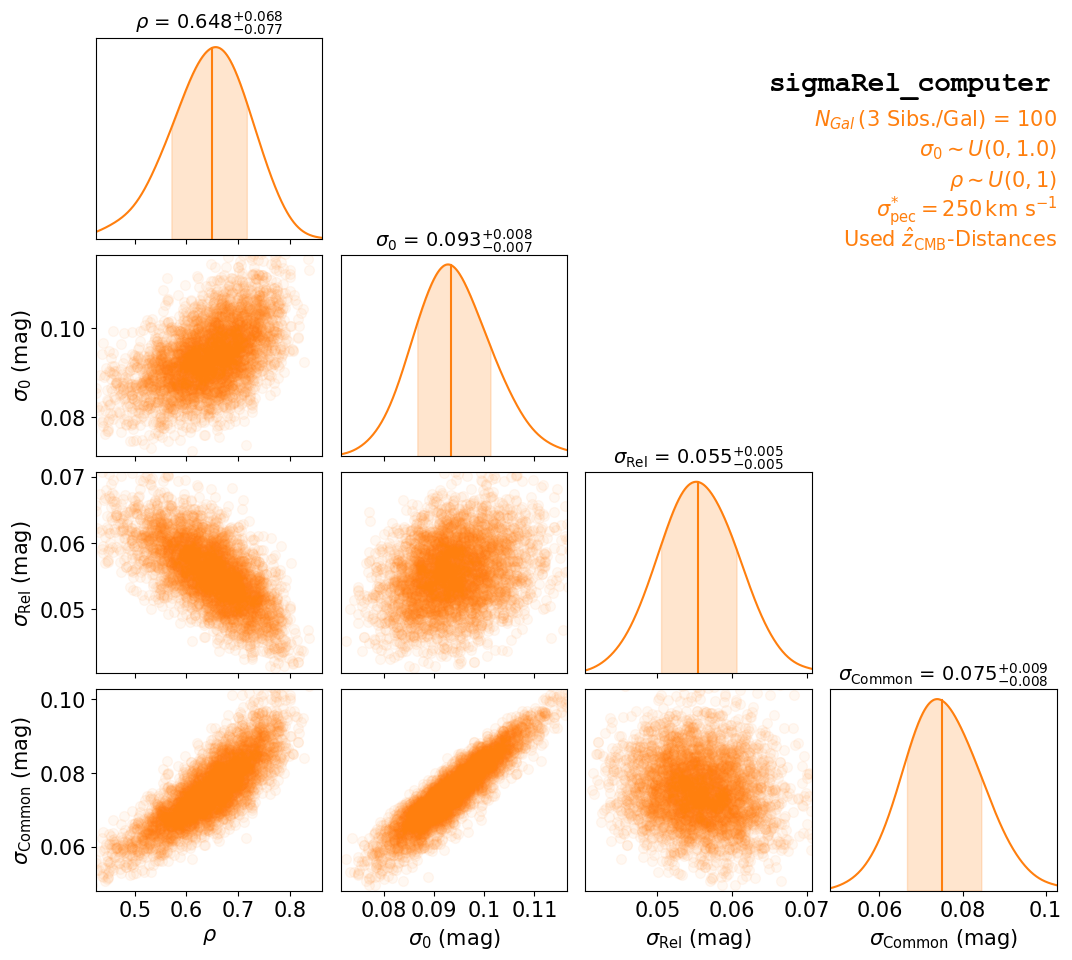

In [14]:
multigal.plot_posterior_samples(show=True,save=False,colour='C1')

### Let's overlay the 1D marginal posteriors from using the Arcsine and uniform $\rho$-hyperpriors 

##############################
sigma0 is a free hyperparameter
sigmapec fixed at 250
Using external distances
sigmaRel is free hyperparameter
##############################
data {
    int<lower=0> Ng;
    array[Ng] int<lower=2> S_g;
    int <lower=Ng*2> Nsibs;

    vector[Nsibs] mu_sib_phots;
    vector[Nsibs] mu_sib_phot_errs;

    vector[Ng] mu_ext_gal;
    vector[Ng] zcosmos;
    vector[Ng] zcosmoerrs;

    //real<lower=0,upper=1> sigma0;    //Data
    real<lower=0,upper=1> pec_unity; //Data
}
transformed data{
  vector[Ng] mu_ext_gal_err_prefac;
  for (n in 1:Ng){
    mu_ext_gal_err_prefac[n] = 5/(log(10)*zcosmos[n]);
  }
}
parameters {
    vector[Ng] mu_true_gal;

    vector[Ng] eta_dM_common;
    vector[Nsibs] eta_dM_rel;

    real<lower=0,upper=1> rho;   //Model
    real<lower=0,upper=1> sigma0;//Model
    //real<lower=0,upper=1> pec_unity;  //Model
}

transformed parameters {
    vector[Ng] dM_common;
    vector[Nsibs] dM_rel;
    vector[Nsibs] dM_sibs;
    real sigmaRel;
    r

/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,col].set_xticklabels(new_xlabels)
/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,col].set_xticklabels(new_xlabels)


5%, 50%, 68%, 95% quantiles: 0.05, 0.06, 0.06,0.06
sigmaRel: 0.06 +/- 0.01; 16th and 84th intervals: -0.0+0.01
###############
5%, 50%, 68%, 95% quantiles: 0.06, 0.08, 0.08,0.09
sigmaCommon: 0.08 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
1D marginals plotted plotted successfully
##############################
sigma0 is a free hyperparameter
sigmapec fixed at 250
Using external distances
sigmaRel is free hyperparameter
Using Alternative PriorC
##############################
data {
    int<lower=0> Ng;
    array[Ng] int<lower=2> S_g;
    int <lower=Ng*2> Nsibs;

    vector[Nsibs] mu_sib_phots;
    vector[Nsibs] mu_sib_phot_errs;

    vector[Ng] mu_ext_gal;
    vector[Ng] zcosmos;
    vector[Ng] zcosmoerrs;

    //real<lower=0,upper=1> sigma0;    //Data
    real<lower=0,upper=1> pec_unity; //Data
}
transformed data{
  vector[Ng] mu_ext_gal_err_prefac;
  for (n in 1:Ng){
    mu_ext_gal_err_prefac[n] = 5/(log(10)*zcosmos[n]);
  }
}
parameters {
    vector[Ng] mu_true_gal

/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,col].set_xticklabels(new_xlabels)
/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,col].set_xticklabels(new_xlabels)


5%, 50%, 68%, 95% quantiles: 0.52, 0.65, 0.68,0.76
rho: 0.65 +/- 0.07; 16th and 84th intervals: -0.08+0.07
###############
p_sigma0_0.094: 53.1 %
5%, 50%, 68%, 95% quantiles: 0.08, 0.09, 0.1,0.11
sigma0: 0.09 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############


/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,col].set_xticklabels(new_xlabels)
/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,col].set_xticklabels(new_xlabels)


5%, 50%, 68%, 95% quantiles: 0.05, 0.06, 0.06,0.06
sigmaRel: 0.06 +/- 0.01; 16th and 84th intervals: -0.0+0.01
###############
5%, 50%, 68%, 95% quantiles: 0.06, 0.07, 0.08,0.09
sigmaCommon: 0.07 +/- 0.01; 16th and 84th intervals: -0.01+0.01
###############
1D marginals plotted plotted successfully


/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,col].set_xticklabels(new_xlabels)
/Users/samward/Documents/PhD/sigmaRel_computer/sigmaRel_computer/./model_files/plotting_script.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,col].set_xticklabels(new_xlabels)


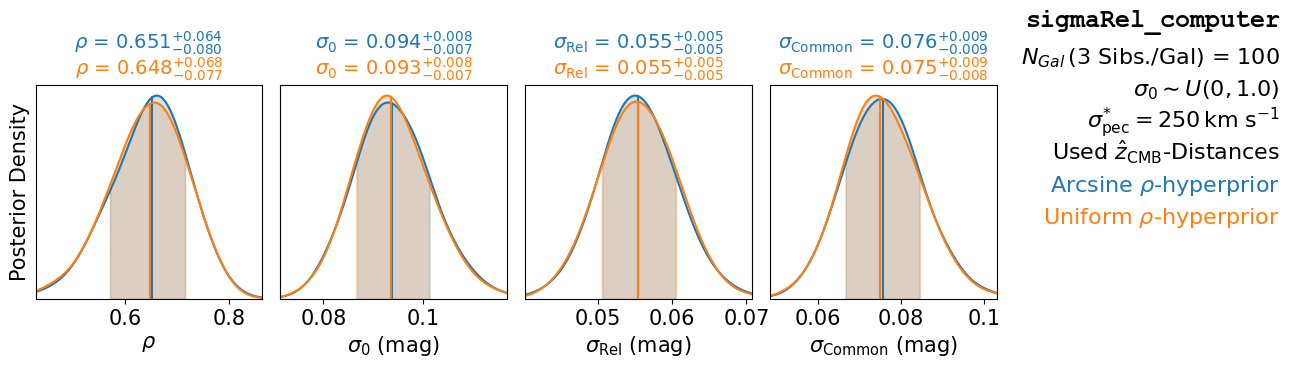

In [15]:
#fig_ax[0]: used for common plot
#fig_ax[1]: the overlay index
#fig_ax[2]: the number of overlays
#fig_ax[3]: indices for common descriptive lines
#fig_ax[4]: new overlay-specific lines

#for fig_ax[3], in this case, the common descriptive lines are indices 0,1,3,4, so specifiy [[0,2],[3,None]]

overwrite=False
multigal.sigmaRel_sampler(alt_prior='arcsine',overwrite=overwrite)
postplot = multigal.plot_posterior_samples_1D(FS=20,fig_ax=[None,0,2,[[0,2],[3,None]],[r'Arcsine $\rho$-hyperprior']],
                                                show=False, save=False,lines=True)
multigal.sigmaRel_sampler(alt_prior='uniform',overwrite=overwrite)
postplot = multigal.plot_posterior_samples_1D(FS=20,fig_ax=[postplot,1,2,[[0,2],[3,None]],[r'Uniform $\rho$-hyperprior']],
                                                show=True, save=False,lines=True)

## That's it!

For more check out scripts in analysis/. In particular, see e.g. simulation_based_calibration.py